# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from lib_file import lib_path
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# EDA (Exploratory Data Analysis)

****Before Data Augmentation****

In [2]:
base_dir = 'colored_images'
class_labels = ['No_DR', 'Mild', 'Moderate', 'Proliferate_DR', 'Severe']

In [3]:
chart_data = []
chart_labels = []

for label in class_labels:
    chart_labels.append(label)
    path = os.path.join(base_dir,label)
    size = len(os.listdir(path))
    chart_data.append(size)
    print(f'Target name: {label:<15} | number of samples in data: {size}')

Target name: No_DR           | number of samples in data: 1805
Target name: Mild            | number of samples in data: 370
Target name: Moderate        | number of samples in data: 999
Target name: Proliferate_DR  | number of samples in data: 295
Target name: Severe          | number of samples in data: 193


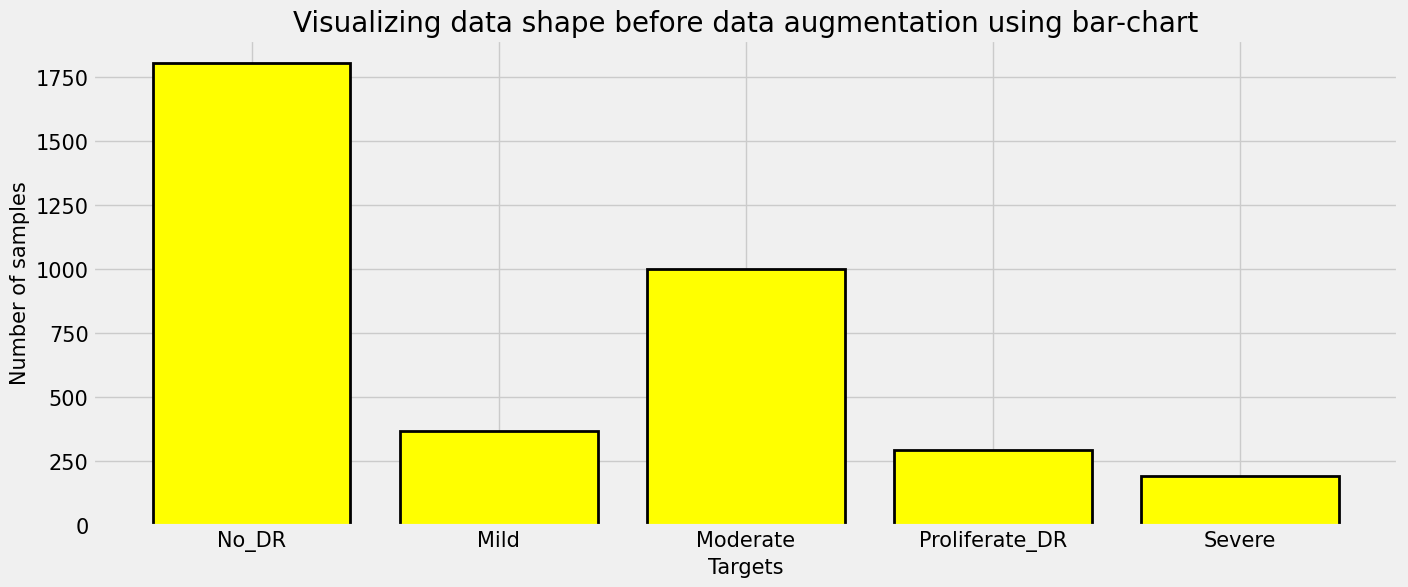

In [10]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(15,6))
    plt.rcParams['font.size']=15
    plt.bar(x=chart_labels,
           height=chart_data,
           edgecolor='black',
           linewidth=2,
            color='yellow')
    plt.title(label='Visualizing data shape before data augmentation using bar-chart', fontsize=20)
    plt.xlabel(xlabel='Targets', fontsize=15)
    plt.ylabel(ylabel='Number of samples', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

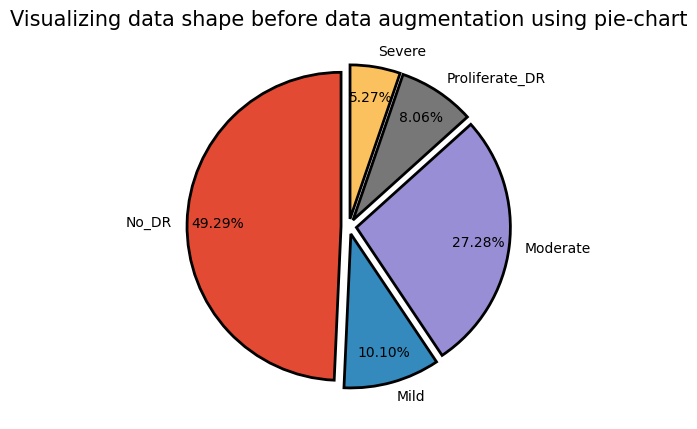

In [4]:
with plt.style.context(style='ggplot'):
    plt.figure(figsize=(5,5))
    plt.rcParams['font.size']=10
    plt.pie(labels=chart_labels,
            explode=[0.05]*len(class_labels),
            x=chart_data,
            autopct='%.2f%%',
            startangle=90,
            pctdistance=0.80, wedgeprops={'linewidth':2,'edgecolor':'black'})
    plt.title(label='Visualizing data shape before data augmentation using pie-chart', fontsize=15)
    plt.show()

****After Data Augmentation****

In [11]:
base_dir = 'Augmented'

In [5]:
chart_data = []
chart_labels = []

for label in class_labels:
    chart_labels.append(label)
    path = os.path.join(base_dir,label)
    size = len(os.listdir(path))
    chart_data.append(size)
    print(f'Target name: {label:<15} | number of samples in data: {size}')

Target name: No_DR           | number of samples in data: 1805
Target name: Mild            | number of samples in data: 370
Target name: Moderate        | number of samples in data: 999
Target name: Proliferate_DR  | number of samples in data: 295
Target name: Severe          | number of samples in data: 193


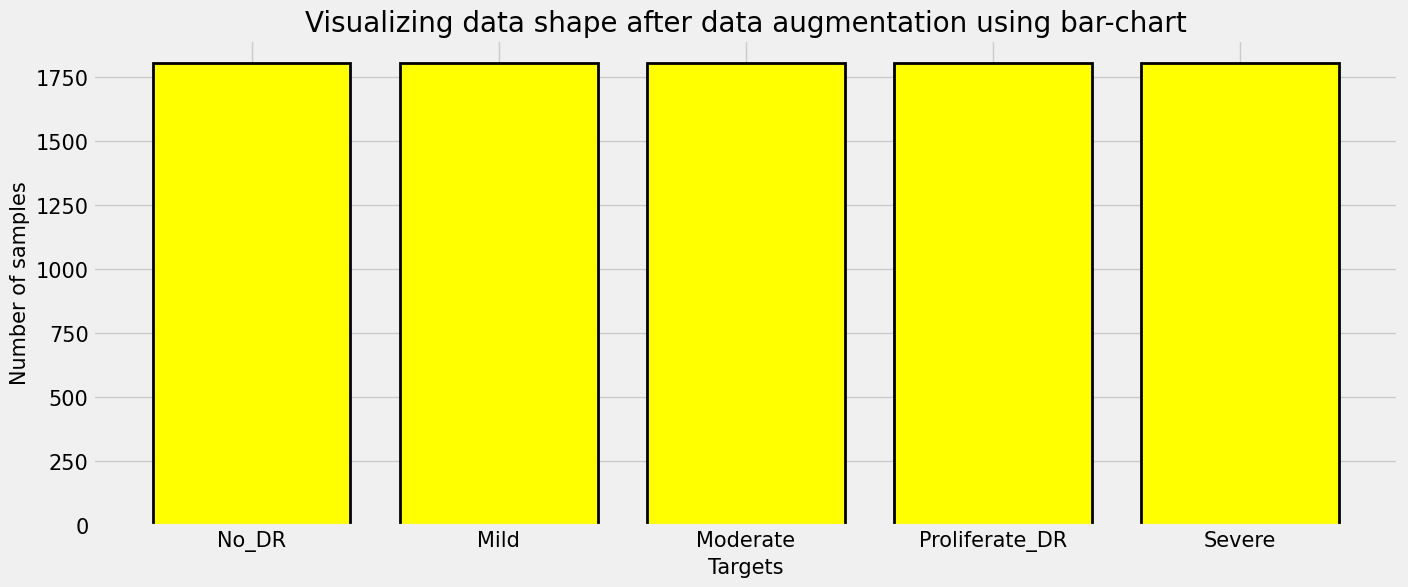

In [13]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(15,6))
    plt.rcParams['font.size']=15
    plt.bar(x=chart_labels,
           height=chart_data,
           edgecolor='black',
           linewidth=2,
            color='yellow')
    plt.title(label='Visualizing data shape after data augmentation using bar-chart', fontsize=20)
    plt.xlabel(xlabel='Targets', fontsize=15)
    plt.ylabel(ylabel='Number of samples', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

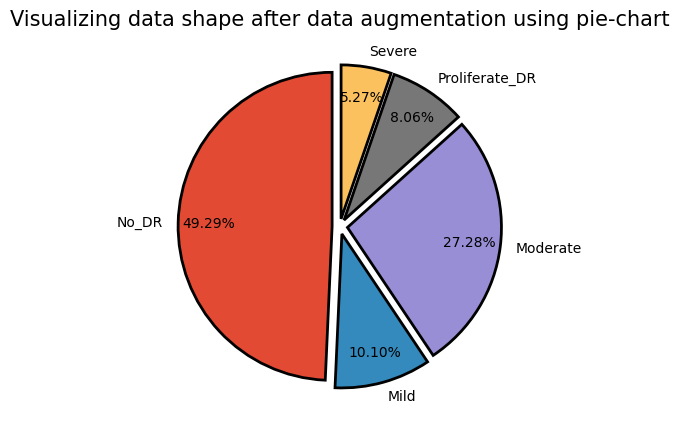

In [6]:
with plt.style.context(style='ggplot'):
    plt.figure(figsize=(5,5))
    plt.rcParams['font.size']=10
    plt.pie(labels=chart_labels,
            explode=[0.05]*len(class_labels),
            x=chart_data,
            autopct='%.2f%%',
            startangle=90,
            pctdistance=0.80, wedgeprops={'linewidth':2,'edgecolor':'black'})
    plt.title(label='Visualizing data shape after data augmentation using pie-chart', fontsize=15)
    plt.show()

In [13]:
X = []
y = []

for idx, label in enumerate(class_labels):
    path = os.path.join(base_dir, label)
    files = os.listdir(path)
    print(f"Loading images from {label} target...")
    for sample in tqdm(files):
        filepath = os.path.join(path, sample)
        try:
            image = cv2.imread(filepath)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (128, 128))
            image = np.array(image)
            image = image/255.0
            X.append(image)
            y.append(idx)
        except:
            continue

Loading images from No_DR target...


100%|██████████| 1805/1805 [01:02<00:00, 28.74it/s] 


Loading images from Mild target...


100%|██████████| 1805/1805 [01:02<00:00, 29.01it/s] 


Loading images from Moderate target...


100%|██████████| 1805/1805 [00:48<00:00, 37.39it/s] 


Loading images from Proliferate_DR target...


100%|██████████| 1805/1805 [00:48<00:00, 36.95it/s] 


Loading images from Severe target...


100%|██████████| 1805/1805 [01:02<00:00, 28.70it/s] 


In [14]:
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(9025, 128, 128, 3) (9025,)


In [7]:
def show_images(images,labels,str_labels):
    plt.figure(figsize=(10,10))
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        idx=random.randint(0, len(images)-1)
        plt.imshow(images[idx])
        plt.axis('off')
        plt.title(label=f"Class: {str_labels[labels[idx]]}")
    plt.tight_layout()
    plt.show()

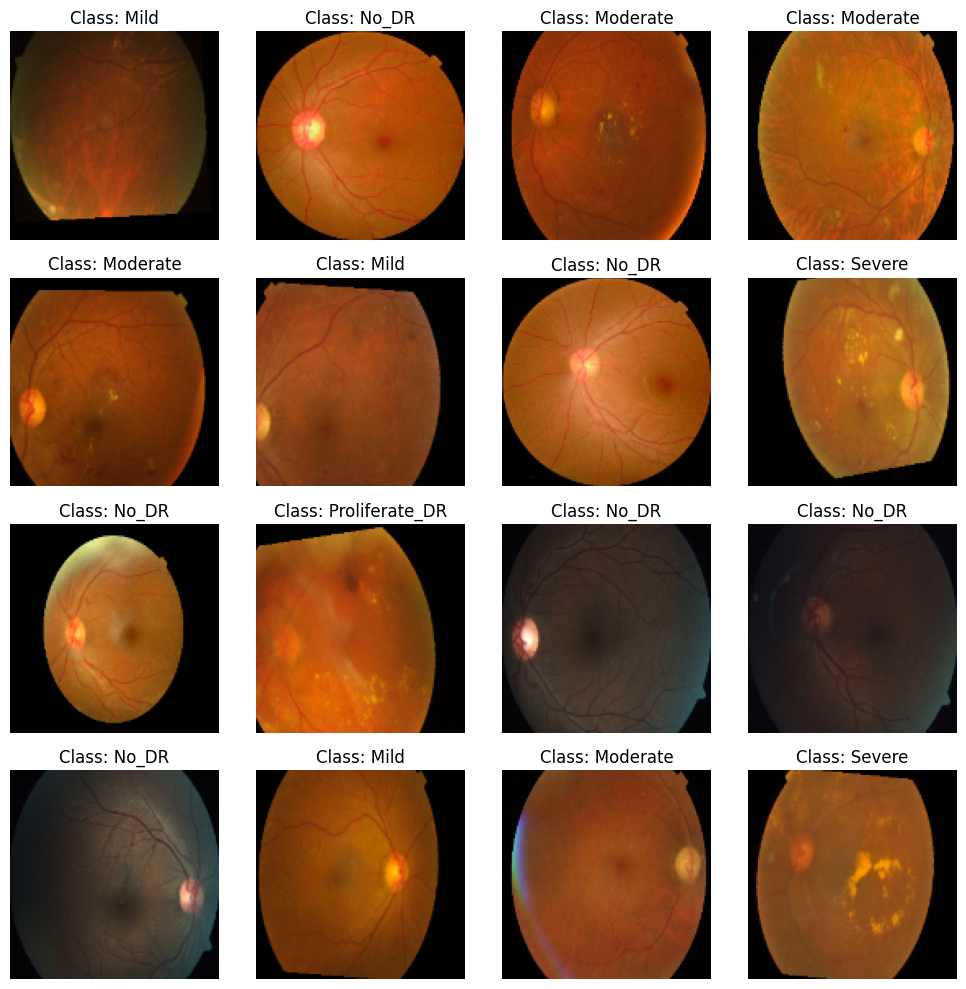

In [16]:
show_images(X, y, class_labels)

# Data Splitting

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7220, 128, 128, 3) (1805, 128, 128, 3) (7220,) (1805,)


# Algorithm: ConvolutionalNeuralNetwork

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, BatchNormalization, Dense, GlobalAveragePooling2D
from tensorflow.keras.regularizers import L2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
y, y_train, y_test = to_categorical(y), to_categorical(y_train), to_categorical(y_test)

NameError: name 'y' is not defined

In [19]:
cnn_model=Sequential()

cnn_model.add(Input(shape=(128, 128, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(filters=512, kernel_size=3, padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(Conv2D(filters=512, kernel_size=3, padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(filters=1024, kernel_size=3, padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(Conv2D(filters=1024, kernel_size=3, padding="same", activation="relu", kernel_regularizer=L2(l2=0.0001)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D())
cnn_model.add(GlobalAveragePooling2D())
cnn_model.add(Dense(units=512, activation="relu"))
cnn_model.add(Dense(units=len(class_labels), activation="softmax"))

In [9]:
cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
cnn_model.summary()

NameError: name 'cnn_model' is not defined

***Model training***

In [21]:
EPOCHS = 10

history = cnn_model.fit(
    x=X,
    y=y,
    batch_size=32,
    epochs=EPOCHS,
    validation_data=(X_train, y_train),
    callbacks=[ReduceLROnPlateau(monitor='val_accuracy', patience=2, min_lr=0)]
)

Epoch 1/10
283/283 [==============================] - 47s 114ms/step - loss: 1.5336 - accuracy: 0.5068 - val_loss: 2.3778 - val_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 2/10
283/283 [==============================] - 25s 90ms/step - loss: 1.3433 - accuracy: 0.5723 - val_loss: 2.4858 - val_accuracy: 0.2539 - lr: 1.0000e-04
Epoch 3/10
283/283 [==============================] - 26s 91ms/step - loss: 1.2699 - accuracy: 0.6132 - val_loss: 1.2197 - val_accuracy: 0.6371 - lr: 1.0000e-04
Epoch 4/10
283/283 [==============================] - 26s 92ms/step - loss: 1.1802 - accuracy: 0.6551 - val_loss: 1.1234 - val_accuracy: 0.6846 - lr: 1.0000e-04
Epoch 5/10
283/283 [==============================] - 26s 93ms/step - loss: 1.1051 - accuracy: 0.6901 - val_loss: 1.0487 - val_accuracy: 0.7139 - lr: 1.0000e-04
Epoch 6/10
283/283 [==============================] - 26s 93ms/step - loss: 1.0152 - accuracy: 0.7306 - val_loss: 1.1894 - val_accuracy: 0.6744 - lr: 1.0000e-04
Epoch 7/10
283/283 [=============

***Accuracy and Loss plot-graphs***

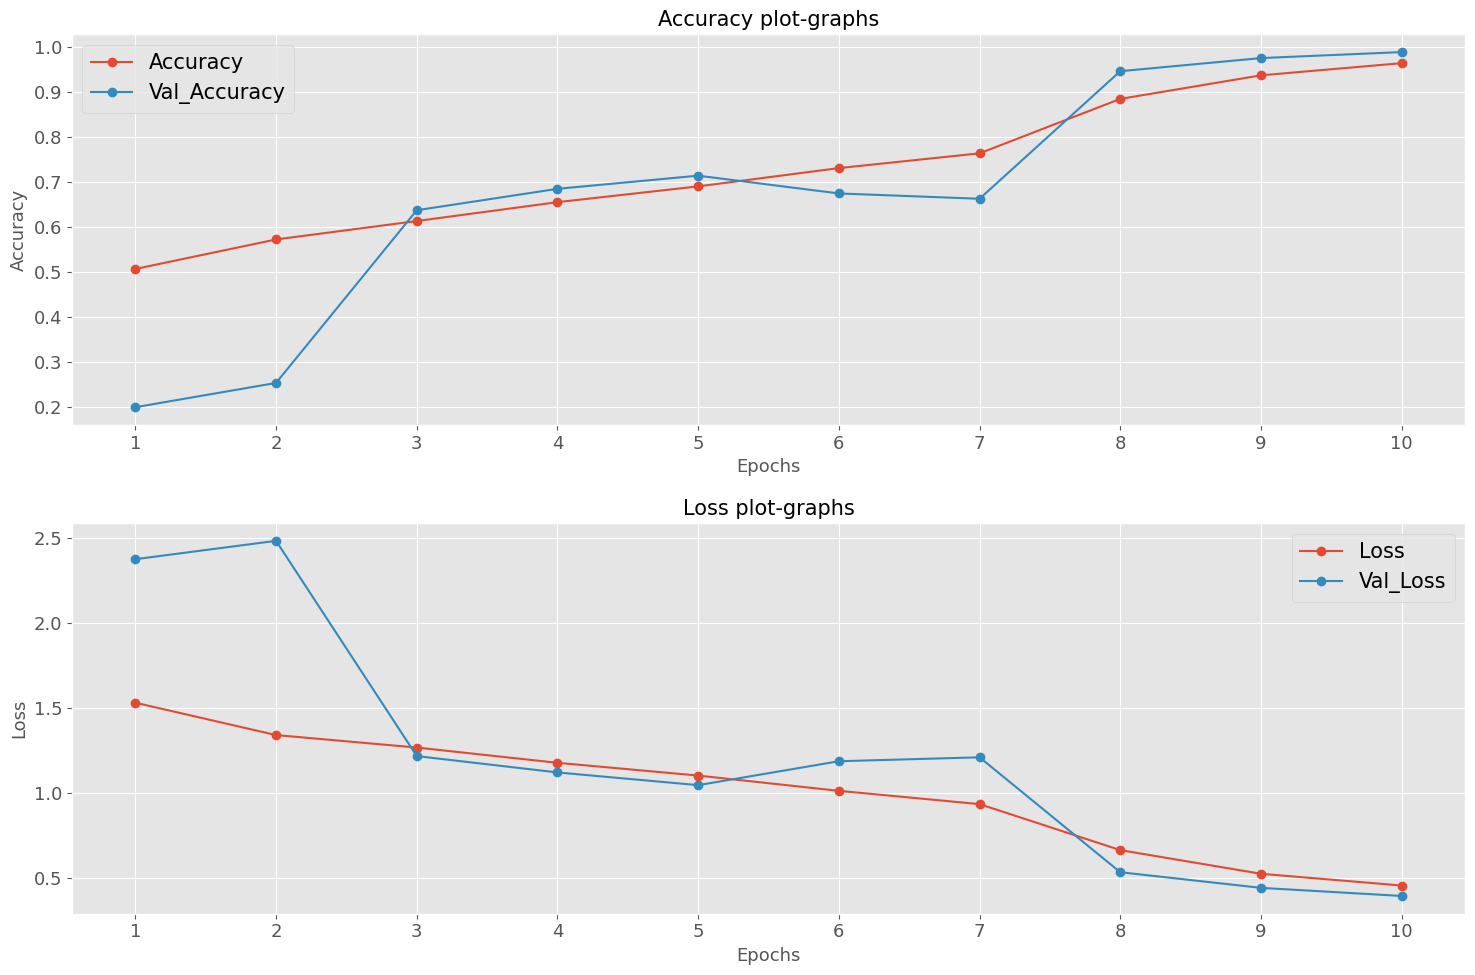

In [22]:
with plt.style.context(style="ggplot"):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
    plt.rcParams["font.size"] = 15

    axes[0].plot([str(i) for i in range(1, EPOCHS+1)], history.history['accuracy'], label='Accuracy', marker='o')
    axes[0].plot([str(i) for i in range(1, EPOCHS+1)], history.history['val_accuracy'], label='Val_Accuracy', marker='o')
    axes[0].set_title(label='Accuracy plot-graphs', fontsize=15)
    axes[0].set_xlabel(xlabel='Epochs', fontsize=13)
    axes[0].set_ylabel(ylabel='Accuracy', fontsize=13)
    axes[0].tick_params(axis='both', which='major', labelsize=13)
    axes[0].legend()

    axes[1].plot([str(i) for i in range(1, EPOCHS+1)], history.history['loss'], label='Loss', marker='o')
    axes[1].plot([str(i) for i in range(1, EPOCHS+1)], history.history['val_loss'], label='Val_Loss', marker='o')
    axes[1].set_title(label='Loss plot-graphs', fontsize=15)
    axes[1].set_xlabel(xlabel='Epochs', fontsize=13)
    axes[1].set_ylabel(ylabel='Loss', fontsize=13)
    axes[1].tick_params(axis='both', which='major', labelsize=13)
    axes[1].legend()

    fig.tight_layout()
    plt.show()

In [23]:
model_prediction = cnn_model.predict(X_test, batch_size=32, verbose=1)

57/57 [==============================] - 2s 39ms/step


In [24]:
print(model_prediction)

[[1.4211076e-04 6.2061212e-05 1.0689049e-02 7.2993045e-03 9.8180747e-01]
 [7.9225574e-05 1.0777534e-02 5.0211567e-02 9.5068060e-02 8.4386355e-01]
 [9.9152899e-01 5.8005773e-03 6.9454883e-04 1.9606818e-03 1.5189890e-05]
 ...
 [4.0024600e-04 9.9799347e-01 1.1162561e-04 1.4928863e-03 1.7778484e-06]
 [2.1710277e-04 9.7847223e-01 3.7420206e-03 1.7489551e-02 7.9097903e-05]
 [5.3314598e-05 3.6485466e-01 6.2888288e-01 5.5481466e-03 6.6101714e-04]]


In [25]:
pred = np.argmax(model_prediction, axis=1)
actual = np.argmax(y_test, axis=1)

In [26]:
print(pred.tolist())

[4, 4, 0, 3, 1, 3, 4, 1, 1, 2, 3, 0, 1, 3, 1, 1, 1, 0, 3, 2, 0, 0, 4, 2, 0, 4, 1, 3, 3, 4, 1, 2, 4, 1, 4, 2, 2, 0, 4, 4, 4, 1, 0, 1, 2, 2, 2, 4, 3, 0, 0, 4, 1, 2, 3, 3, 4, 0, 3, 1, 3, 2, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 4, 2, 2, 1, 1, 4, 4, 3, 1, 3, 0, 0, 0, 3, 2, 2, 3, 1, 2, 0, 0, 4, 2, 2, 3, 4, 2, 2, 1, 1, 0, 1, 2, 1, 2, 4, 3, 4, 4, 2, 4, 0, 2, 0, 4, 0, 2, 1, 0, 0, 3, 3, 1, 1, 3, 4, 3, 4, 4, 1, 2, 3, 0, 2, 0, 0, 4, 0, 3, 1, 4, 0, 1, 2, 1, 4, 2, 2, 1, 4, 1, 2, 4, 4, 4, 2, 4, 1, 0, 2, 4, 0, 1, 2, 2, 2, 2, 4, 2, 4, 3, 3, 4, 4, 2, 3, 0, 1, 0, 3, 2, 1, 0, 2, 0, 0, 1, 0, 4, 2, 3, 0, 0, 1, 3, 1, 2, 2, 3, 4, 3, 4, 2, 3, 2, 3, 2, 2, 0, 1, 3, 2, 0, 1, 0, 2, 1, 0, 0, 2, 4, 2, 2, 0, 3, 0, 4, 4, 3, 3, 1, 3, 2, 0, 4, 3, 3, 3, 0, 0, 1, 1, 1, 1, 0, 1, 3, 3, 0, 4, 4, 4, 1, 4, 1, 1, 4, 1, 4, 4, 0, 3, 0, 0, 1, 0, 2, 1, 2, 3, 3, 0, 0, 0, 2, 1, 1, 3, 0, 2, 2, 0, 4, 4, 0, 3, 4, 2, 2, 3, 4, 3, 3, 0, 3, 1, 4, 0, 1, 0, 4, 1, 2, 3, 1, 4, 0, 4, 4, 4, 0, 0, 2, 1, 3, 4, 0, 4, 4, 4, 2, 4, 3, 0, 2, 2, 4, 

In [27]:
print(actual.tolist())

[4, 4, 0, 3, 1, 3, 4, 1, 1, 2, 3, 0, 1, 3, 1, 1, 1, 0, 3, 2, 0, 0, 4, 2, 0, 4, 1, 3, 3, 4, 1, 2, 4, 1, 4, 2, 2, 0, 4, 4, 4, 1, 0, 1, 2, 2, 2, 4, 3, 0, 0, 4, 1, 2, 3, 3, 4, 0, 3, 1, 3, 2, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 4, 2, 2, 1, 1, 4, 4, 3, 1, 3, 0, 0, 0, 3, 2, 2, 3, 1, 2, 0, 0, 4, 2, 2, 3, 4, 2, 2, 1, 1, 0, 1, 2, 1, 2, 4, 3, 4, 4, 2, 4, 0, 2, 0, 4, 0, 2, 1, 0, 0, 3, 3, 1, 1, 3, 4, 3, 4, 4, 1, 2, 3, 0, 2, 0, 0, 4, 0, 3, 1, 4, 0, 1, 2, 1, 4, 2, 2, 1, 4, 1, 2, 4, 4, 4, 2, 4, 1, 0, 2, 4, 0, 1, 2, 2, 2, 2, 4, 2, 4, 3, 3, 4, 4, 2, 3, 0, 1, 0, 3, 2, 1, 0, 2, 0, 0, 1, 0, 4, 2, 3, 0, 0, 1, 3, 1, 2, 2, 3, 4, 3, 4, 2, 3, 2, 3, 2, 2, 0, 1, 3, 2, 0, 1, 1, 2, 1, 0, 0, 2, 4, 2, 2, 0, 3, 1, 4, 4, 3, 3, 1, 3, 2, 0, 4, 3, 3, 3, 0, 0, 1, 1, 1, 1, 0, 1, 3, 3, 0, 4, 4, 4, 1, 4, 1, 1, 4, 1, 4, 4, 0, 3, 0, 0, 1, 0, 2, 1, 2, 3, 3, 0, 0, 0, 2, 1, 1, 3, 0, 2, 2, 0, 4, 4, 0, 3, 4, 2, 2, 3, 4, 3, 3, 0, 3, 1, 4, 0, 1, 0, 4, 1, 2, 3, 1, 4, 0, 4, 4, 4, 0, 0, 2, 1, 3, 4, 0, 4, 4, 4, 2, 4, 3, 0, 2, 2, 4, 

### Result Analysis

In [28]:
model_accuracy = accuracy_score(y_true=actual, y_pred=pred)
print(f"Validation accuracy of ConvolutionalNeuralNetwork model is {model_accuracy*100.0:.2f}%")

Validation accuracy of ConvolutionalNeuralNetwork model is 99.34%


***Classification Report***

In [29]:
df = pd.DataFrame(classification_report(y_true=actual, y_pred=pred, output_dict=True))
df = df.T
df = df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0)
df['support'] = df['support'].astype(int)
df

precision   recall  f1-score  support
0   0.991758  1.00000  0.995862      361
1   0.997191  0.98338  0.990237      361
2   0.994413  0.98615  0.990264      361
3   0.991736  0.99723  0.994475      361
4   0.991758  1.00000  0.995862      361

***Confusion Matrix***

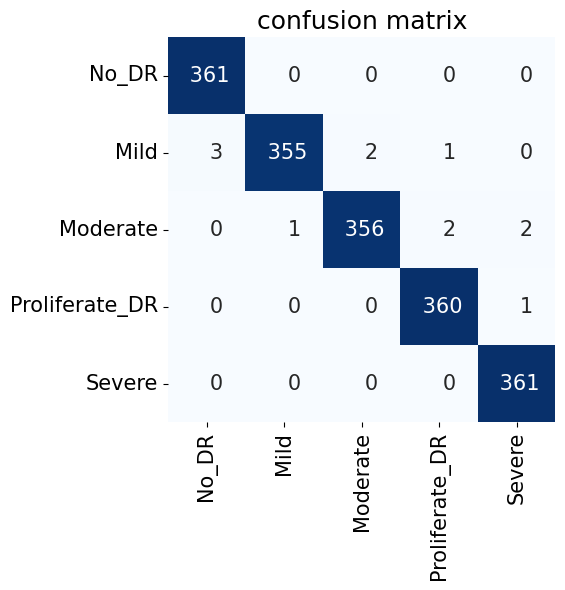

In [30]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size']=15
ax=sns.heatmap(data=confusion_matrix(y_true=actual, y_pred=pred),
               annot=True,
               fmt='4d',
               cbar=False,
               xticklabels=class_labels,
               yticklabels=class_labels,
               cmap=plt.cm.Blues)
plt.title(label='confusion matrix')
plt.show()

***model saving***

In [1]:
cnn_model.save("model/ConvolutionalNeuralNetwork_model.h5")

NameError: name 'cnn_model' is not defined

---